## 1. Import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

## 2. Load data

In [29]:
df1 = pd.read_csv("world_macro_economic_overview.csv")
df1.head()

,Country Name,GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$),Unnamed: 12,Consumer price index (2010 = 100)
0,Afghanistan,..,..,..,..,..,..,..,..,..,..,..,NaN,NaN
1,Albania,18916378861,6.725202715,9.866013431,..,-3.057676036,37.39542221,47.75425831,113.0416667,7.619755885,4.856401652,6810.114041,NaN,NaN
2,Algeria,1.95E+11,9.265515516,21.51758493,..,-11.12397431,35.3352258,23.70705845,141.994975,0.038790102,3.200001647,4342.637968,NaN,NaN
3,American Samoa,871000000,..,14.15276486,..,..,46.95752009,77.72675086,..,..,1.735015773,19673.3901,NaN,NaN
4,Andorra,3352031094,..,4.213076377,..,..,..,..,0.950915534,..,8.809579348,41992.77278,NaN,NaN


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 14 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Name                                                      266 non-null    object 
 1   GDP (current US$)                                                 266 non-null    object 
 2   Inflation, consumer prices (annual %)                             266 non-null    object 
 3   Inflation, GDP deflator (annual %)                                266 non-null    object 
 4   Unemployment, total (% of total labor force) (national estimate)  266 non-null    object 
 5   Real interest rate (%)                                            266 non-null    object 
 6   Exports of goods and services (% of GDP)                          266 non-null    object 
 7   Imports of goods and services (% of

In [31]:
duplicates = df1.duplicated().sum()
print("There are", duplicates, "columns that contain duplicates.")

There are 0 columns that contain duplicates.


In [32]:
df1 = df1.drop(columns=['Unnamed: 12', 'Consumer price index (2010 = 100)'])

# Replace '..' with NaN
df1 = df1.replace('..', np.nan)

# Convert appropriate columns to numeric types
cols_to_convert = df1.columns[1:]  # All columns except 'Country Name'
for col in cols_to_convert:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Display the cleaned df1 types and the first few rows
df1_info = df1.info()
df1_head = df1.head()

df1_info, df1_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Name                                                      266 non-null    object 
 1   GDP (current US$)                                                 242 non-null    float64
 2   Inflation, consumer prices (annual %)                             213 non-null    float64
 3   Inflation, GDP deflator (annual %)                                243 non-null    float64
 4   Unemployment, total (% of total labor force) (national estimate)  110 non-null    float64
 5   Real interest rate (%)                                            93 non-null     float64
 6   Exports of goods and services (% of GDP)                          198 non-null    float64
 7   Imports of goods and services (% of

(None,
      Country Name  GDP (current US$)  Inflation, consumer prices (annual %)  \
 0     Afghanistan                NaN                                    NaN   
 1         Albania       1.891638e+10                               6.725203   
 2         Algeria       1.950000e+11                               9.265516   
 3  American Samoa       8.710000e+08                                    NaN   
 4         Andorra       3.352031e+09                                    NaN   
 
    Inflation, GDP deflator (annual %)  \
 0                                 NaN   
 1                            9.866013   
 2                           21.517585   
 3                           14.152765   
 4                            4.213076   
 
    Unemployment, total (% of total labor force) (national estimate)  \
 0                                                NaN                  
 1                                                NaN                  
 2                                       

In [33]:
df1.describe()

,GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$)
count,2.420000e+02,213.000000,243.000000,110.000000,93.000000,198.000000,200.000000,167.000000,233.000000,243.000000,243.000000
mean,3.478245e+12,11.577459,11.575565,6.275669,-0.818094,44.494084,48.623096,695.756151,3.207869,4.225313,18011.238532
std,1.132089e+13,17.605291,20.408382,4.419256,10.331316,32.209179,29.581975,2627.117289,35.401256,6.009117,27178.784117
min,5.906598e+07,-6.687321,-4.466440,0.130000,-49.955193,1.571162,1.127672,0.306250,-394.471644,-29.100000,259.025031
25%,1.379943e+10,5.821158,5.285429,3.768000,-3.348652,25.781541,28.340674,2.700000,1.157756,2.582986,2337.056150
50%,7.506795e+10,8.160590,7.573110,5.263500,0.766250,35.563672,39.475190,16.548860,2.174740,3.896010,7182.265382
75%,8.990000e+11,10.773751,12.355322,6.947899,3.597947,53.005457,61.711087,206.683594,4.110260,5.644578,20831.155720
max,1.010000e+14,171.205491,264.580608,28.838000,37.387696,211.278206,189.929795,23271.212500,359.249671,63.368439,240862.182400


In [34]:
missing_values = df1.isnull().sum()
total_missing_values = (missing_values).sum()
total_cells = np.product(df1.shape)
percent_missing_values = (total_missing_values / total_cells) * 100
print("Percent of data that is missing", percent_missing_values)
print(missing_values)

Percent of data that is missing 23.214285714285715
Country Name                                                          0
GDP (current US$)                                                    24
Inflation, consumer prices (annual %)                                53
Inflation, GDP deflator (annual %)                                   23
Unemployment, total (% of total labor force) (national estimate)    156
Real interest rate (%)                                              173
Exports of goods and services (% of GDP)                             68
Imports of goods and services (% of GDP)                             66
Official exchange rate (LCU per US$, period average)                 99
Foreign direct investment, net inflows (% of GDP)                    33
GDP growth (annual %)                                                23
GDP per capita (current US$)                                         23
dtype: int64


==> Loại bỏ cột GDP Growth vì missing value quá lớn 

In [35]:
# df1.drop(columns=["GDP Growth"], inplace=True)

In [36]:
numerical_columns = df1.select_dtypes(include=["float64"])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df1[numerical_columns] = df1[numerical_columns].fillna(
    df1[numerical_columns].mean())

missing_values = df1.isnull().sum()
print(missing_values)

Country Name                                                        0
GDP (current US$)                                                   0
Inflation, consumer prices (annual %)                               0
Inflation, GDP deflator (annual %)                                  0
Unemployment, total (% of total labor force) (national estimate)    0
Real interest rate (%)                                              0
Exports of goods and services (% of GDP)                            0
Imports of goods and services (% of GDP)                            0
Official exchange rate (LCU per US$, period average)                0
Foreign direct investment, net inflows (% of GDP)                   0
GDP growth (annual %)                                               0
GDP per capita (current US$)                                        0
dtype: int64


In [37]:
df1.columns

Index(['Country Name', 'GDP (current US$)',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Real interest rate (%)', 'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Official exchange rate (LCU per US$, period average)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita (current US$)'],
      dtype='object')

In [38]:
interesting_features1 = ['GDP (current US$)',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Real interest rate (%)', 'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Official exchange rate (LCU per US$, period average)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita (current US$)']
numeric_columns1 = df1[interesting_features1]
corr_matrix1 = numeric_columns1.corr()
corr_matrix1

,GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$)
GDP (current US$),1.000000,-0.057911,-0.062010,-0.060978,-0.002443,-0.144279,-0.210630,-0.007392,-0.014386,-0.051413,0.073963
"Inflation, consumer prices (annual %)",-0.057911,1.000000,0.629643,0.032842,-0.160145,-0.105891,-0.084349,-0.000186,0.005624,-0.091627,-0.092918
"Inflation, GDP deflator (annual %)",-0.062010,0.629643,1.000000,0.008921,-0.435587,-0.109376,-0.144259,-0.020302,-0.005721,-0.066368,-0.096468
"Unemployment, total (% of total labor force) (national estimate)",-0.060978,0.032842,0.008921,1.000000,0.064544,-0.147159,-0.055017,-0.121954,0.024587,0.054947,-0.180291
Real interest rate (%),-0.002443,-0.160145,-0.435587,0.064544,1.000000,-0.021127,0.037545,0.097187,0.021836,0.058990,-0.094033
Exports of goods and services (% of GDP),-0.144279,-0.105891,-0.109376,-0.147159,-0.021127,1.000000,0.852251,0.021796,-0.214747,-0.026974,0.372709
Imports of goods and services (% of GDP),-0.210630,-0.084349,-0.144259,-0.055017,0.037545,0.852251,1.000000,0.006258,-0.165014,-0.035614,0.203637
"Official exchange rate (LCU per US$, period average)",-0.007392,-0.000186,-0.020302,-0.121954,0.097187,0.021796,0.006258,1.000000,0.000512,0.024221,-0.091798
"Foreign direct investment, net inflows (% of GDP)",-0.014386,0.005624,-0.005721,0.024587,0.021836,-0.214747,-0.165014,0.000512,1.000000,0.030331,-0.049695
GDP growth (annual %),-0.051413,-0.091627,-0.066368,0.054947,0.058990,-0.026974,-0.035614,0.024221,0.030331,1.000000,0.042869


Text(0.5, 1.0, 'Correlation Matrix - interesting_features')

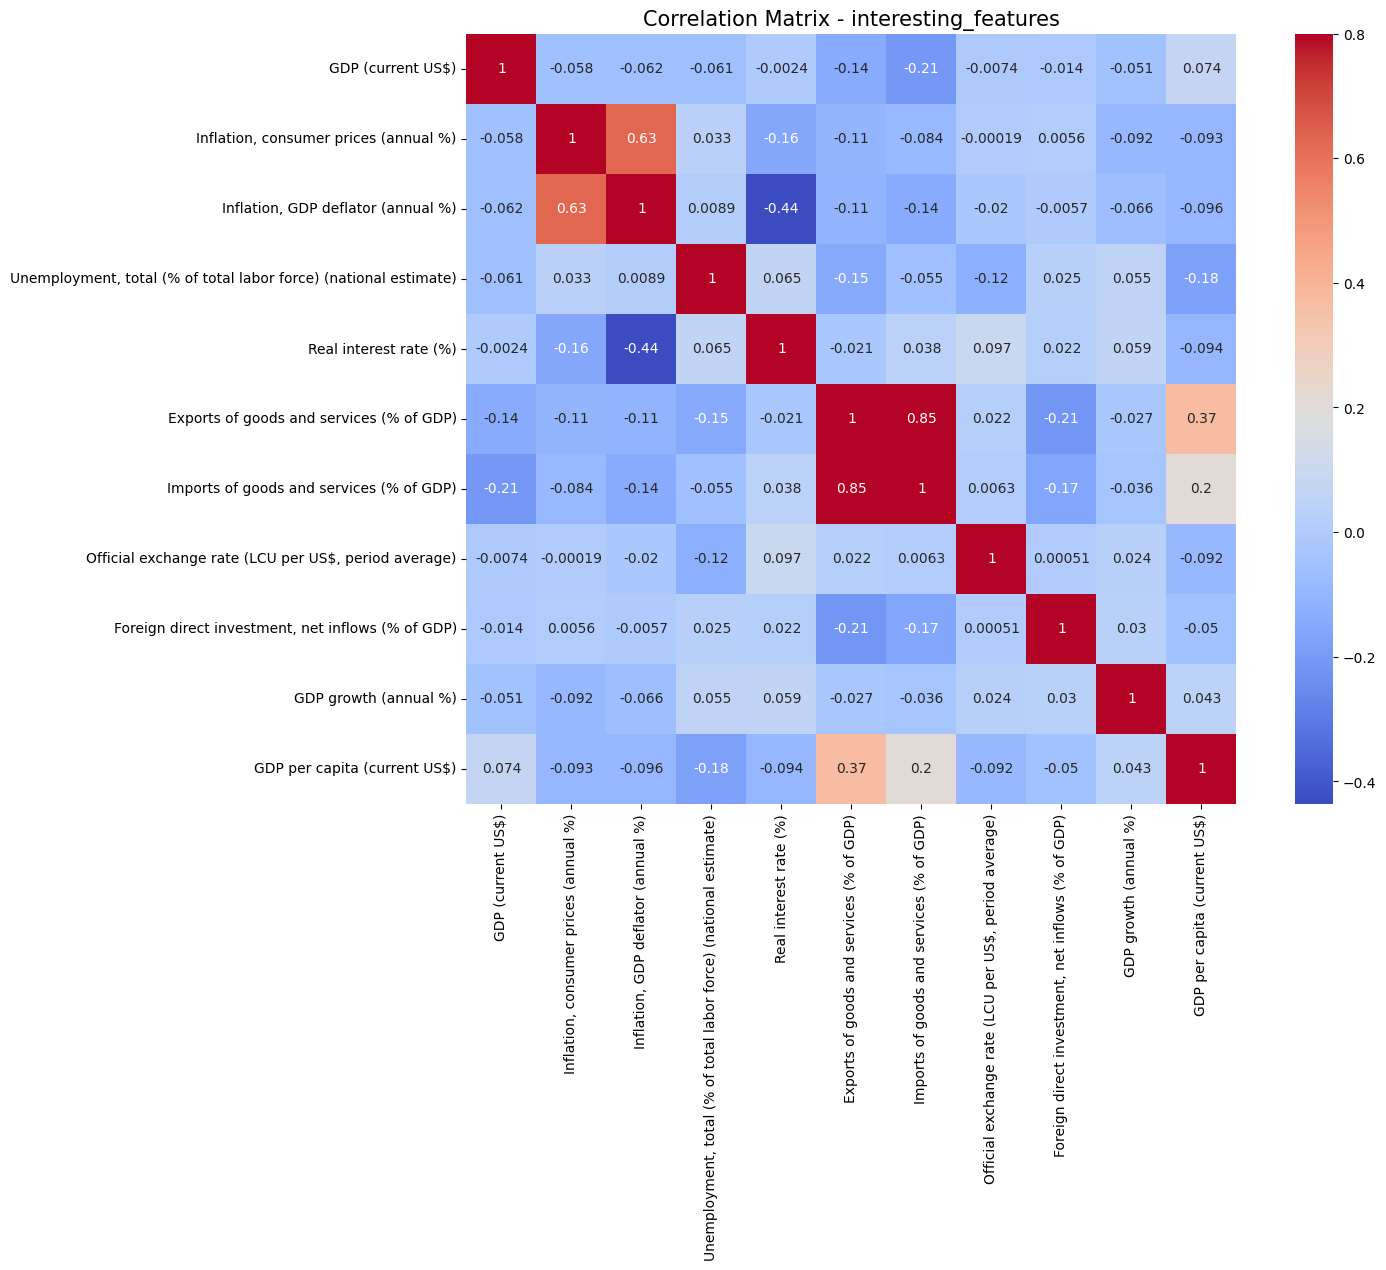

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(corr_matrix1, vmax=0.8, square=True, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - interesting_features", fontsize=15)

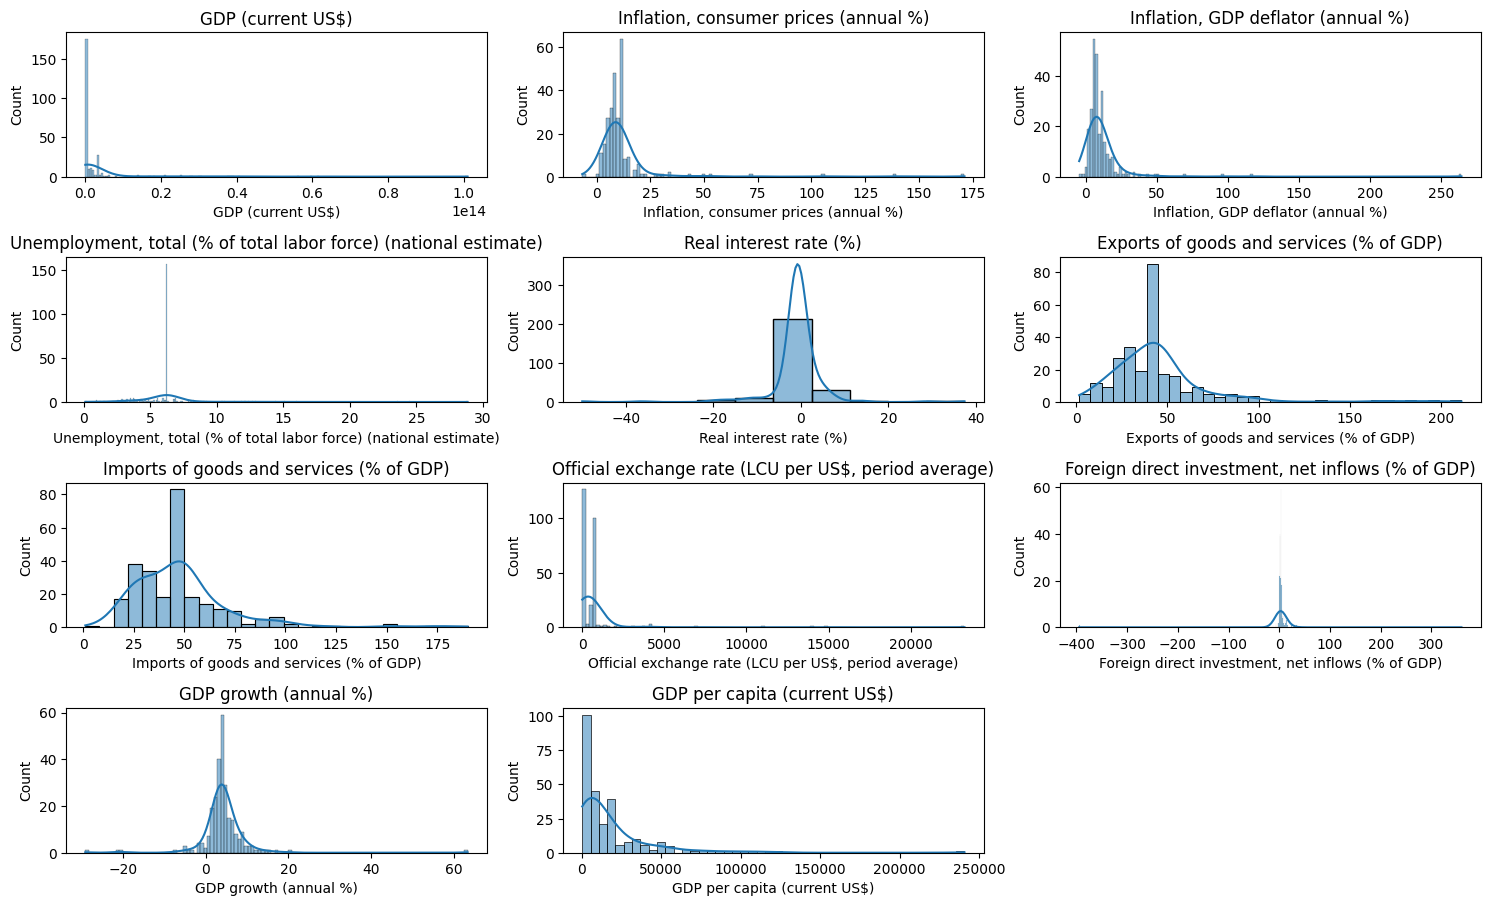

In [40]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numeric_columns1, start=1):
    plt.subplot(9, 3, i)
    sns.histplot(df1[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [41]:
Scaler = MinMaxScaler()
Axes1 = Scaler.fit_transform(numeric_columns1)
Axes1 = pd.DataFrame(Axes1, columns=interesting_features1)
Axes1.shape

(266, 11)

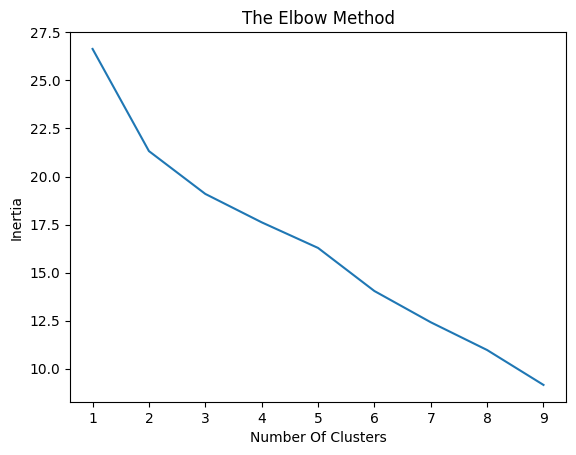

In [42]:
InertiaList = []
NumberOfClustersRange = range(1, 10)

for i in range(1, 10):
    clusteringModel = KMeans(n_clusters=i, random_state=25)
    clusteringModel.fit(Axes1)
    InertiaList.append(clusteringModel.inertia_)

pyplot.plot(range(1, 10), InertiaList)
pyplot.xlabel("Number Of Clusters")
pyplot.ylabel("Inertia")
pyplot.title("The Elbow Method")
pyplot.show()

In [43]:
model = KMeans(n_clusters=4, random_state=29)
y_clusters1 = model.fit_predict(Axes1)
len(y_clusters1)

266

In [44]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(Axes1)
pca_df = pd.DataFrame(data=pca_components, columns=["PCA1", "PCA2", "PCA3"])
pca_df["Cluster"] = y_clusters1

In [45]:
pca_df

,PCA1,PCA2,PCA3,Cluster
0,-1.224819e-16,-2.152553e-17,2.793435e-18,0
1,-3.082100e-02,-3.938670e-02,-2.427023e-02,0
2,-1.297680e-01,-3.082100e-02,4.814243e-02,0
3,1.174760e-01,-4.999026e-02,-1.512546e-03,2
4,2.962841e-02,4.022058e-02,1.364867e-02,2
...,...,...,...,...
261,-1.466779e-01,-2.192074e-02,-2.761040e-02,0
262,-1.472024e-01,-2.186008e-02,-2.757469e-02,0
263,-1.466779e-01,-2.192074e-02,-2.761040e-02,0
264,-1.909935e-01,1.833481e-01,-3.165710e-02,0


In [46]:
# fig = px.scatter_3d(
#     pca_df,
#     x="PCA1",
#     y="PCA2",
#     z="PCA3",
#     color="Cluster",
#     title="3D PCA Cluster Visualization",
# )

# fig.show()

In [47]:
# ClusterAssignments = pd.DataFrame({"Country": df1["Country"], "Cluster": y_clusters1})

In [48]:
# fig = px.choropleth(
#     ClusterAssignments,
#     locations="Country",
#     locationmode="country names",
#     color="Cluster",
#     hover_name="Country",
#     title="Clusters",
#     color_continuous_scale="YlGnBu",
#     width=1000,
#     height=600,
# )
# fig.show()

In [49]:
df1[y_clusters1 == 1]

,Country Name,GDP (current US$),"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$)
54,Djibouti,3.515109e+09,5.179808,0.673506,6.275669,-0.818094,169.000457,171.193558,177.721000,5.320542,3.123833,3136.112768
86,"Hong Kong SAR, China",3.600000e+11,1.881367,1.810448,4.318000,3.235148,193.861101,189.929795,7.831417,34.017451,-3.476330,48983.621720
93,Ireland,5.330000e+11,7.807375,6.582264,4.479000,-0.818094,137.087781,97.179571,695.756151,-0.356167,9.433022,103983.291300
116,Luxembourg,8.164181e+10,6.336008,5.683547,4.585000,-0.818094,211.278206,177.235463,695.756151,-394.471644,1.380186,125006.021800
123,Malta,1.812556e+10,6.153756,5.273574,2.929000,-0.818094,165.290672,152.454342,695.756151,26.643313,6.915792,34127.510560
171,Singapore,4.670000e+11,6.121060,9.051761,3.591000,-0.818094,186.552565,150.309924,1.378667,30.172996,3.646972,82807.629060


In [50]:
Axes1["cluster"] = y_clusters1

## Sự phân bố của GDP trong các cụm

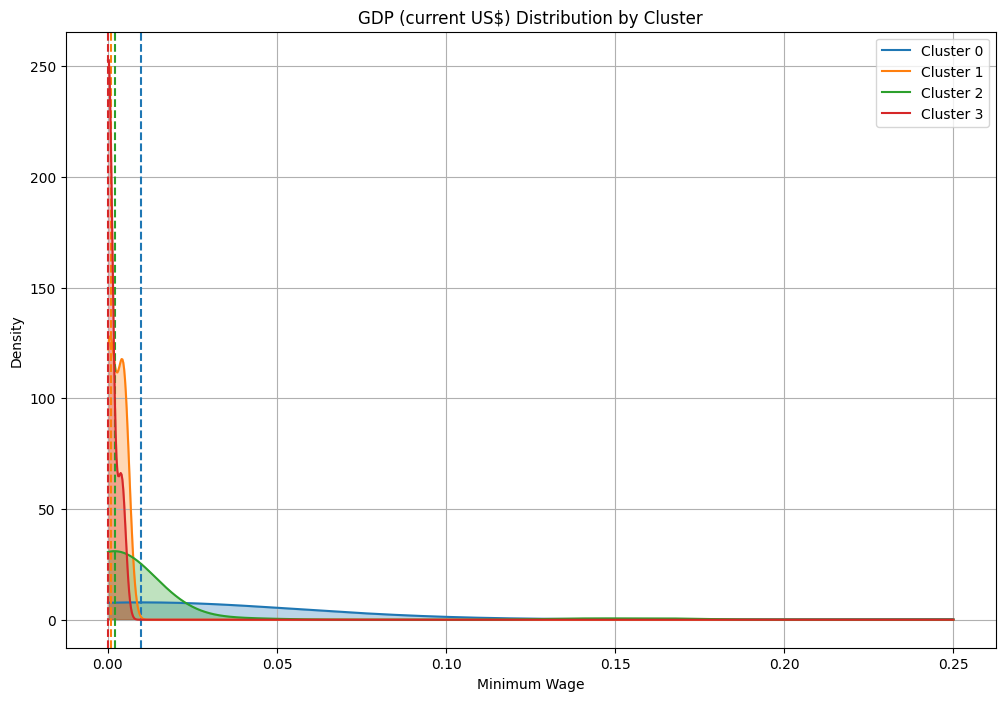

In [51]:
xx1 = "GDP (current US$)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=4)

for cluster_num in range(4):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 0.25, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel("Minimum Wage")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()